In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm
import datetime as dt

### Import data

In [3]:
abort = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/26feb23/output.abort.nc')
feb25_GridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_U.nc')
feb25_GridV = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_V.nc')
feb25_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
feb25_restart = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_00034560_restart.nc')

xIdxAb = 226 - 1     #fortran indexing starts at 1
yIdxAb = 374 - 1     #fortran indexing starts at 1

abort

<xarray.Dataset>
Dimensions:       (y: 826, x: 710, deptht: 39, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-02-26T00:00:19
Dimensions without coordinates: y, x
Data variables: (12/14)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, deptht, y, x) float32 ...
    ...            ...
    soshfldo      (time_counter, y, x) float32 ...
    soicecov      (time_counter, y, x) float32 ...
    sozotaux      (time_counter, y, x) float32 ...
    sometauy      (time_counter, y, x) float32 ...
    vovvldep      (time_counter, deptht, y, x) float32 ...
    vovvle3t      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    12/11/2024 15:19:54 -0800
    file_name:    output.abort.nc

In [4]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]

Text(0.5, 1.0, 'u-velocity')

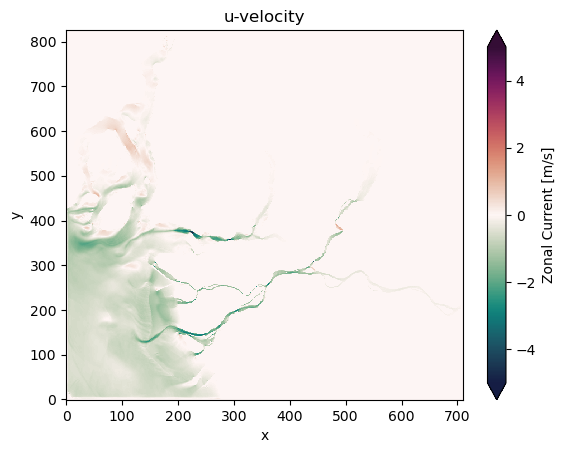

In [5]:
abort['vozocrtx'][0,0].plot(cmap=cm.cm.curl,vmin=-5,vmax=5)
# plt.ylim(300,400)
# plt.xlim(110,280)
plt.title('u-velocity')

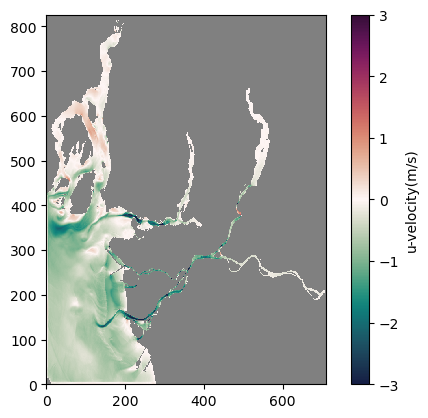

In [6]:
masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 0], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
# ax.set_xlim(100,450)
# ax.set_ylim(300,500)

(110.0, 280.0)

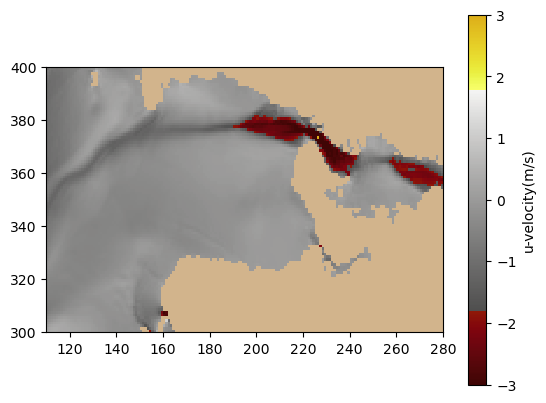

In [7]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(300,400)
plt.xlim(110,280)

(180.0, 260.0)

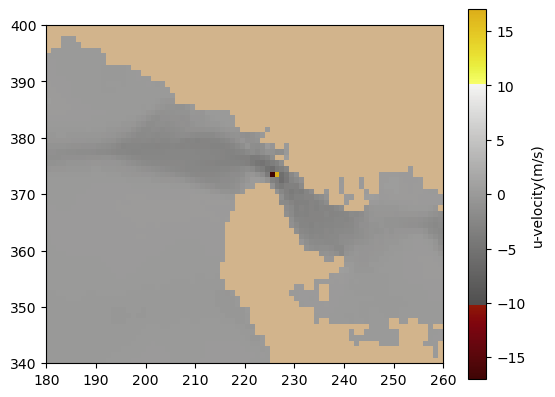

In [8]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-17,vmax=17,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(340,400)
plt.xlim(180,260)

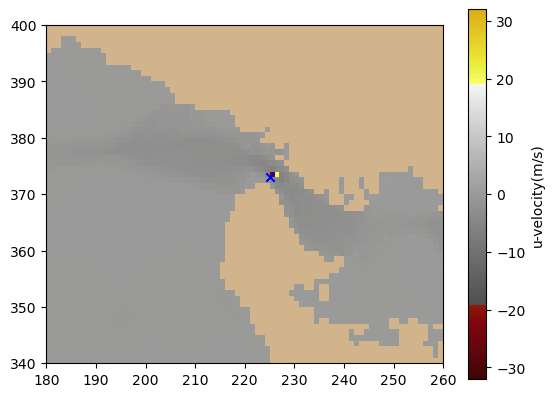

In [9]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(340,400)
plt.xlim(180,260)

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

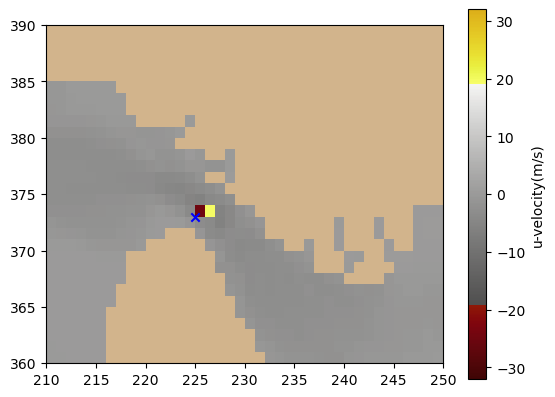

In [10]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(360,390)
plt.xlim(210,250)

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

(180.0, 260.0)

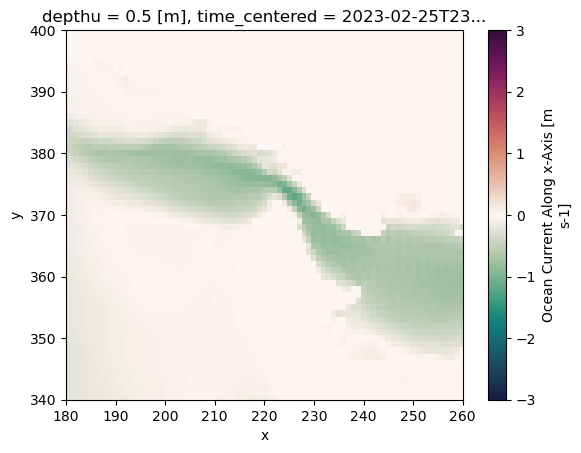

In [11]:
feb25_GridU['vozocrtx'][23,0].plot(cmap=cm.cm.curl,vmin=-3,vmax=3)
plt.ylim(340,400)
plt.xlim(180,260)

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

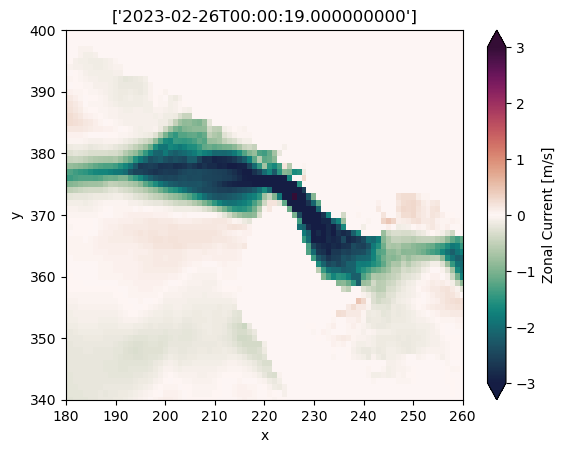

In [12]:
abort['vozocrtx'][0,0].plot(cmap=cm.cm.curl,vmin=-3,vmax=3)
plt.ylim(340,400)
plt.xlim(180,260)
plt.title(abort['vozocrtx'].time_counter.values)

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

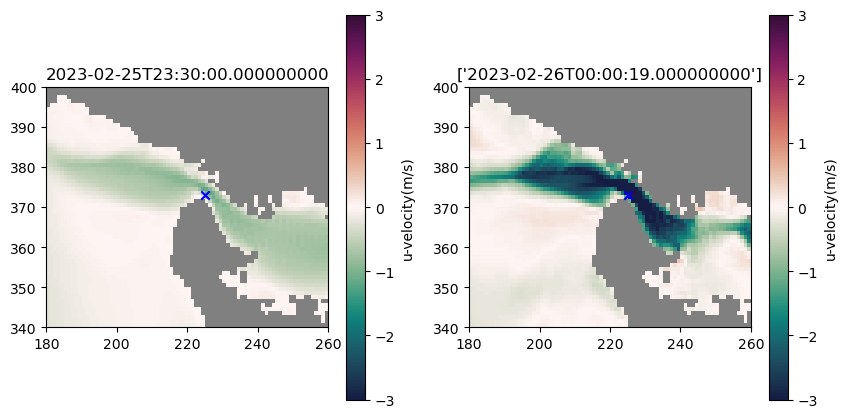

In [13]:
maskedUvel_feb25 = np.ma.masked_array(feb25_GridU.vozocrtx[23, 0], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedUvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridU['vozocrtx'].time_counter.values[23])

pm = ax2.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vozocrtx'].time_counter.values)

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

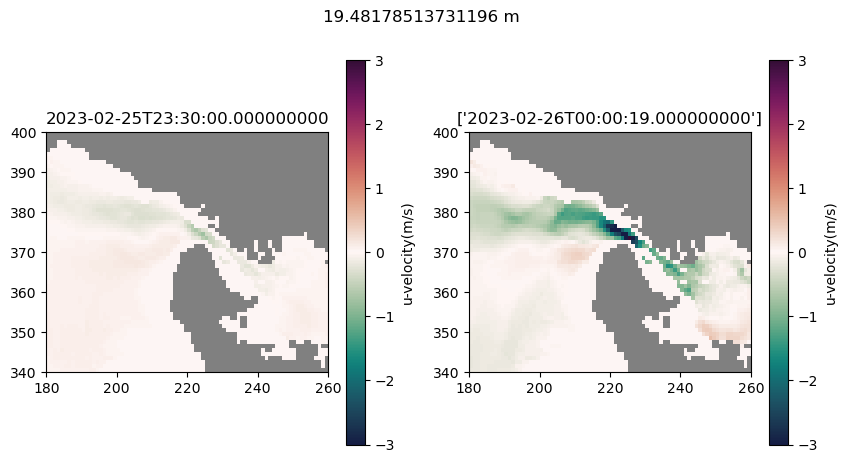

In [14]:
maskedUvel_feb25 = np.ma.masked_array(feb25_GridU.vozocrtx[23, 18], mask=umask[0])
masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 18], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedUvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridU['vozocrtx'].time_counter.values[23])
fig.suptitle(f'{mesh.gdept_1d[0,18].values} m')

pm = ax2.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vozocrtx'].time_counter.values)

Text(0.5, 0.98, 'u-velocity with depth')

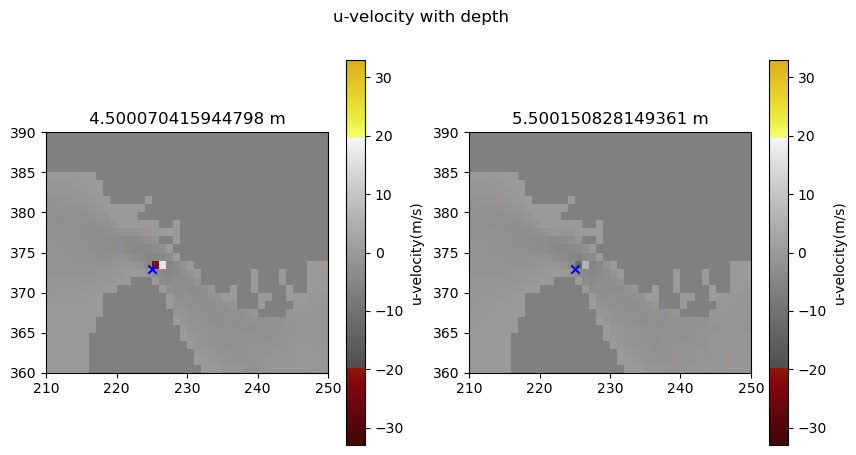

In [15]:
fig,[ax2,ax3] = plt.subplots(1,2,figsize=(10,5))

masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 4], mask=umask[0])

cmap = cm.cm.oxy
cmap.set_bad('grey')

pm = ax2.pcolormesh(masked_uvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax2.set_ylim(360,390)
ax2.set_xlim(210,250)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(f'{mesh.gdept_1d[0,4].values} m')

masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 5], mask=umask[0])

pm = ax3.pcolormesh(masked_uvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax3);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax3.set_ylim(360,390)
ax3.set_xlim(210,250)
ax3.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax3.set_title(f'{mesh.gdept_1d[0,5].values} m')

fig.suptitle('u-velocity with depth')

### Look at v-velocity

Text(0.5, 1.0, 'v-velocity')

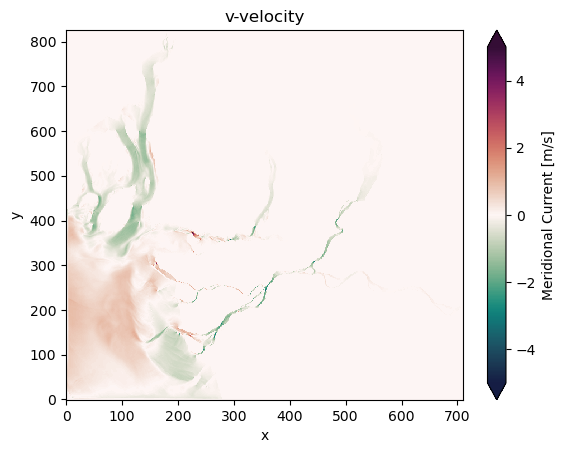

In [16]:
abort['vomecrty'][0,0].plot(cmap=cm.cm.curl,vmin=-5,vmax=5)
plt.title('v-velocity')

In [17]:
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 0], mask=umask[0])

Text(0.5, 1.0, 'v-velocity')

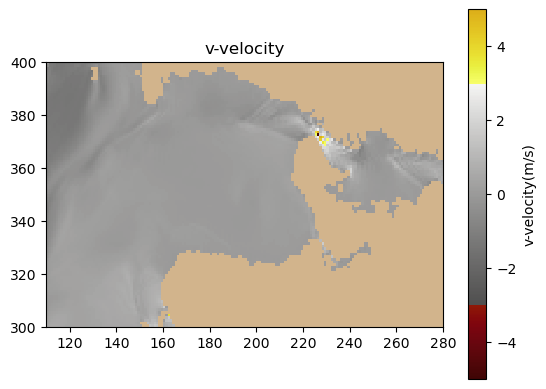

In [18]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_vvel,vmin=-5,vmax=5,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
plt.ylim(300,400)
plt.xlim(110,280)
plt.title('v-velocity')

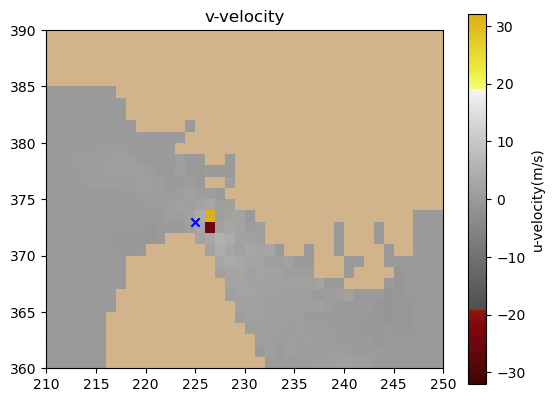

In [19]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_vvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(360,390)
plt.xlim(210,250)
plt.title('v-velocity')

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

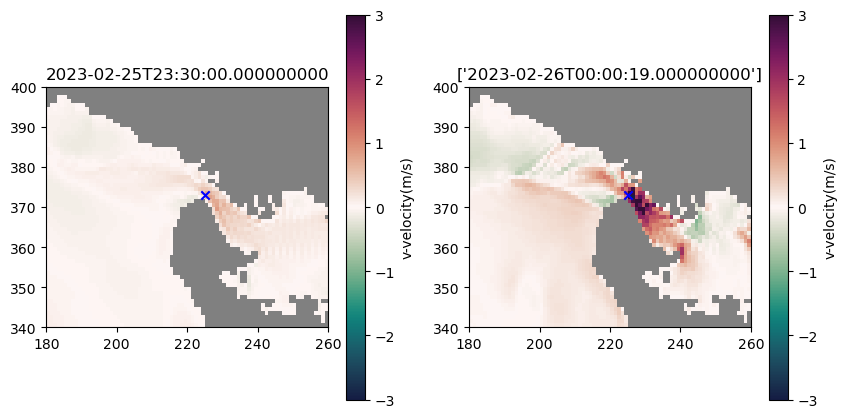

In [20]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

maskedVvel_feb25 = np.ma.masked_array(feb25_GridV.vomecrty[23, 0], mask=umask[0])
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 0], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedVvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridV['vomecrty'].time_counter.values[23])

pm = ax2.pcolormesh(masked_vvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vomecrty'].time_counter.values)


Text(0.5, 0.98, '19.48178513731196 m')

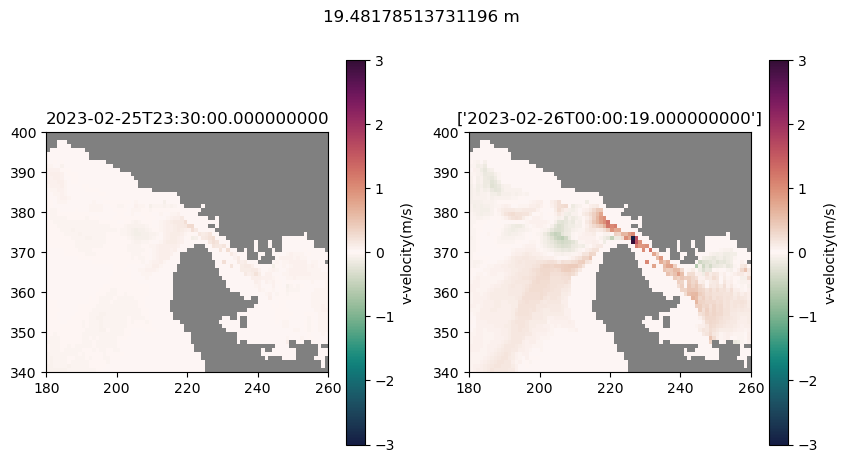

In [21]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

maskedVvel_feb25 = np.ma.masked_array(feb25_GridV.vomecrty[23, 18], mask=umask[0])
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 18], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedVvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridV['vomecrty'].time_counter.values[23])

pm = ax2.pcolormesh(masked_vvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vomecrty'].time_counter.values)

fig.suptitle(f'{mesh.gdept_1d[0,18].values} m')

Text(0.5, 0.98, 'v-velocity wth depth')

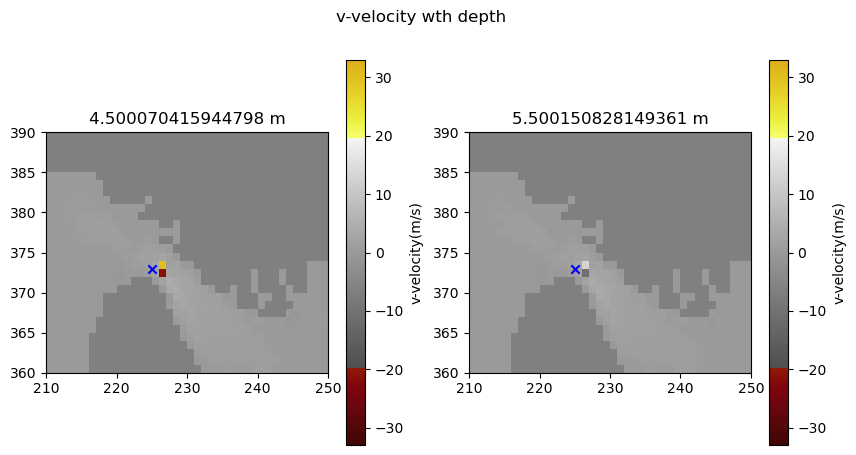

In [22]:
fig,[ax2,ax3] = plt.subplots(1,2,figsize=(10,5))

masked_vvel = np.ma.masked_array(abort.vomecrty[0, 4], mask=umask[0])

cmap = cm.cm.oxy
cmap.set_bad('grey')

pm = ax2.pcolormesh(masked_vvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax2.set_ylim(360,390)
ax2.set_xlim(210,250)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(f'{mesh.gdept_1d[0,4].values} m')

masked_vvel = np.ma.masked_array(abort.vomecrty[0, 5], mask=umask[0])

pm = ax3.pcolormesh(masked_vvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax3);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax3.set_ylim(360,390)
ax3.set_xlim(210,250)
ax3.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax3.set_title(f'{mesh.gdept_1d[0,5].values} m')

fig.suptitle('v-velocity wth depth')

### Look at w-velocity

In [23]:
abort.vovecrtz

<xarray.DataArray 'vovecrtz' (time_counter: 1, deptht: 39, y: 826, x: 710)>
[22871940 values with dtype=float32]
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-02-26T00:00:19
Dimensions without coordinates: y, x
Attributes:
    units:               m/s
    standard_name:       Vertical Velocity
    long_name:           Vertical Velocity
    online_operation:    inst(x)
    interval_operation:  20.0
    interval_write:      20.0

Text(0.5, 1.0, 'w-velocity')

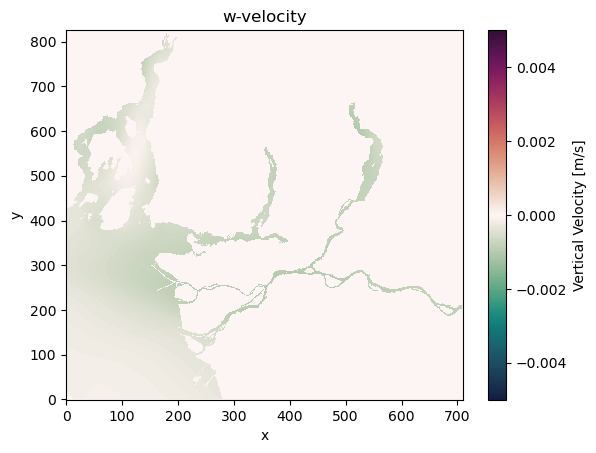

In [24]:
abort['vovecrtz'][0,0].plot(cmap=cm.cm.curl,vmin=-0.005,vmax=0.005)
plt.title('w-velocity')

Not a problem with w-velocity

### Look at salinity

Text(0.5, 0.98, 'surface salinity')

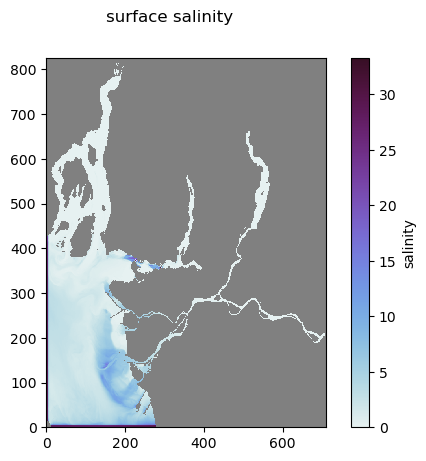

In [25]:
masked_sal = np.ma.masked_array(abort.vosaline[0, 0], mask=umask[0])

cmap = cm.cm.dense
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle('surface salinity')

Text(0.5, 0.98, 'Surface salinity')

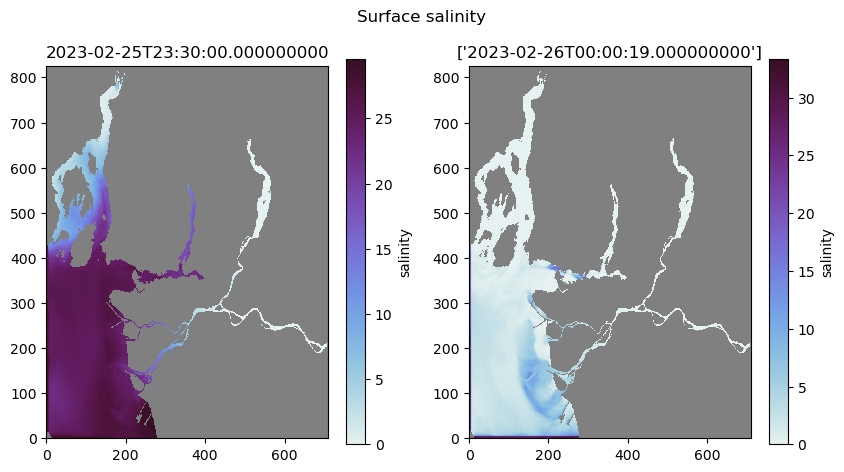

In [26]:
maskedSal_feb25 = np.ma.masked_array(feb25_GridT.vosaline[23, 0], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedSal_feb25,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_sal,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)

fig.suptitle('Surface salinity')

Text(0.5, 0.98, '25 m depth')

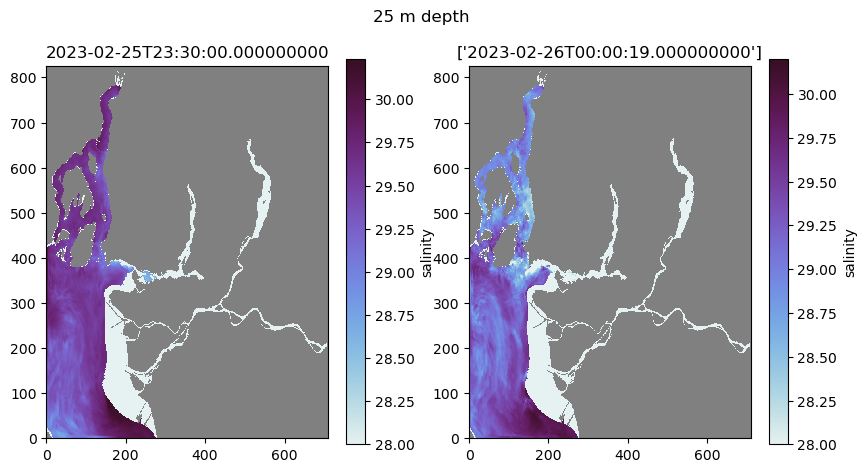

In [27]:
masked_sal = np.ma.masked_array(abort.vosaline[0, 20], mask=umask[0])
maskedSal_feb25 = np.ma.masked_array(feb25_GridT.vosaline[23, 20], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedSal_feb25,cmap=cmap,vmin=28)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_sal,cmap=cmap,vmin=28)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)

fig.suptitle('25 m depth')

Text(0.5, 0.98, '200 m depth')

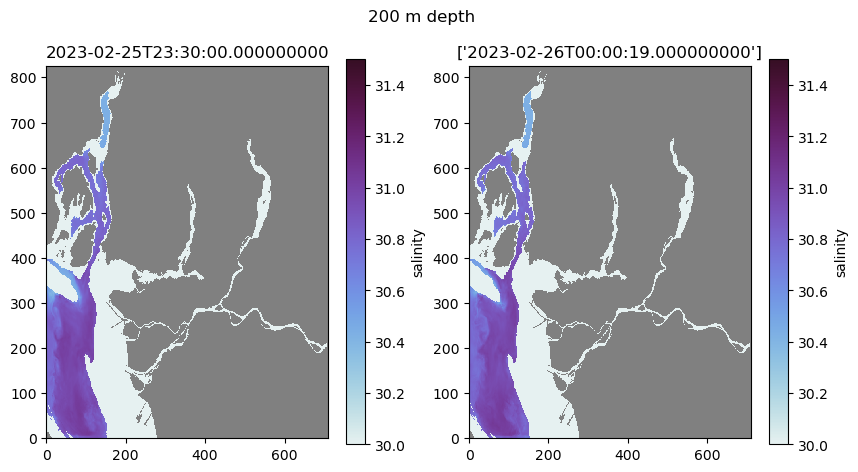

In [28]:
masked_sal = np.ma.masked_array(abort.vosaline[0, 30], mask=umask[0])
maskedSal_feb25 = np.ma.masked_array(feb25_GridT.vosaline[23, 30], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedSal_feb25,cmap=cmap,vmin=30,vmax=31.5)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_sal,cmap=cmap,vmin=30,vmax=31.5)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)

fig.suptitle('200 m depth')

In [29]:
mesh.gdept_1d[0,15].values

array(15.63428737)

### Look at temperature

Text(0.5, 0.98, 'Surface temperature')

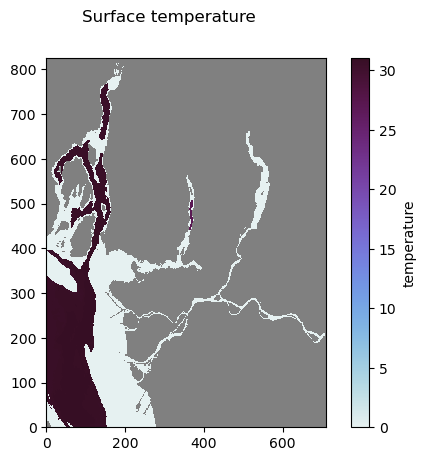

In [30]:
masked_temp = np.ma.masked_array(abort.votemper[0, 0], mask=tmask[0])

cmap = cm.cm.dense
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('temperature')
fig.suptitle('Surface temperature')

Text(0.5, 0.98, 'Surface temperature')

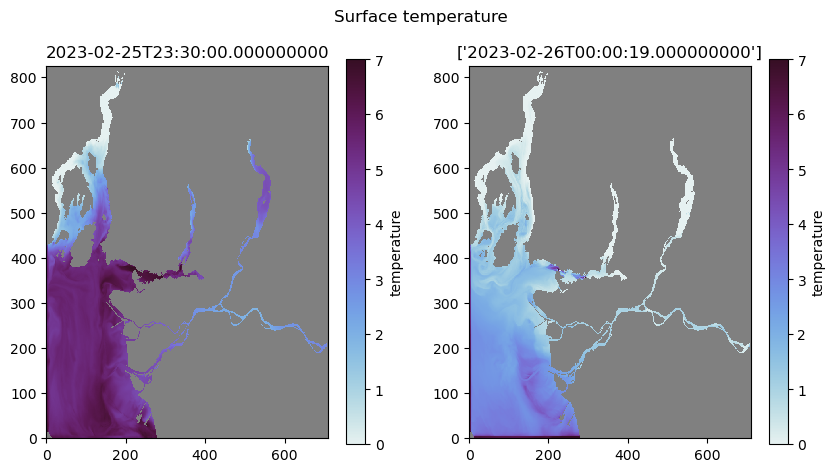

In [31]:
maskedTemp_feb25 = np.ma.masked_array(feb25_GridT.votemper[23, 0], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedTemp_feb25,cmap=cmap,vmin=0,vmax=7)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('temperature')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_temp,cmap=cmap,vmin=0,vmax=7)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('temperature')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)
fig.suptitle('Surface temperature')
# ax1.axvline(100)

In [32]:
HoweSound = feb25_GridT.sel(x=slice(0, 200), y=slice(400, 810))
mesh_HS = mesh.sel(x=slice(0, 200), y=slice(400,810))
HoweSound2 = feb25_GridT.sel(x=slice(100, 200), y=slice(400, 810))
mesh_HS2 = mesh.sel(x=slice(100, 200), y=slice(400,810))

new_ds = mesh_HS.copy()
new_ds = new_ds.assign_coords(x=('x', mesh_HS['x'].values), y=('y', mesh_HS['y'].values))

new_ds2 = mesh_HS2.copy()
new_ds2 = new_ds2.assign_coords(x=('x', mesh_HS2['x'].values), y=('y', mesh_HS2['y'].values))

# new_ds2 = HoweSound.copy()
# new_ds2 = new_ds2.assign_coords(x=('x', HoweSound['x'].values), y=('y', HoweSound['y'].values))

# Find the deepest point in the channel
DeepPoint_X = new_ds['mbathy'].idxmax(dim='x')  
DP_x = DeepPoint_X[0].values
DP_y = DeepPoint_X.y.values
 
salinityHS_DP = HoweSound.vosaline.isel(x=DP_x, y=DP_y)


# # Find the deepest point in the channel
# masked_data = new_ds2['vosaline'][23, :].where(new_ds2['vosaline'][23, :] != 0)
# FreshPoint_X = masked_data.idxmin(dim='x')  
# FP_x = FreshPoint_X[0].values.astype(int)
# FP_y = FreshPoint_X.y.values.astype(int)
 
# salinityHS_FP = HoweSound['vosaline'].isel(x=FP_x, y=FP_y)

# Find the deepest point in the channel
DeepPoint_X2 = new_ds2['mbathy'].idxmax(dim='x')  
DP_x2 = DeepPoint_X2[0].values
DP_y2 = DeepPoint_X2.y.values
 
salinityHS_DP2 = HoweSound2.vosaline.isel(x=DP_x2, y=DP_y2)

In [33]:
mask = np.logical_and(DP_x2 < 30, DP_y2 > 75)
DP_x2[mask] = DP_x2[mask] + 30

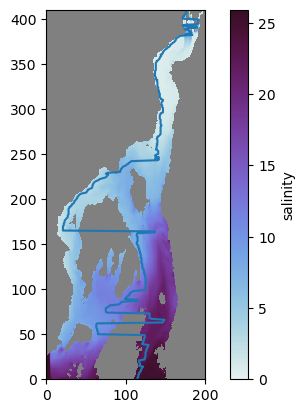

In [34]:
tmask2 = 1 - mesh_HS.tmask[0]

maskedHS = np.ma.masked_array(HoweSound.vosaline[23,0], mask=tmask2[0])

fig,ax1 = plt.subplots()

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedHS,cmap=cmap,vmin=0)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')

ax1.plot(DP_x,DP_y)
# ax1.plot(FP_x,FP_y)

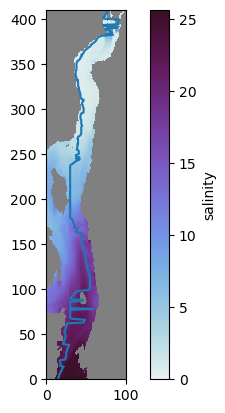

In [35]:
tmask2 = 1 - mesh_HS2.tmask[0]

maskedHS2 = np.ma.masked_array(HoweSound2.vosaline[23,0], mask=tmask2[0])

fig,ax1 = plt.subplots()

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedHS2,cmap=cmap,vmin=0)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')

ax1.plot(DP_x2,DP_y2)

In [36]:
ProfilesDict = {}

for ii in range(24):
    
    ProfilesDict[ii] = np.zeros((39,410))
    
    for jj in range(len(DP_x)):
        ProfilesDict[ii][:,jj] = HoweSound.vosaline[ii,:,DP_y[jj],DP_x[jj]].values

In [37]:
ProfilesDict2 = {}

for ii in range(24):
    
    ProfilesDict2[ii] = np.zeros((39,410))
    
    for jj in range(len(DP_x2)):
        ProfilesDict2[ii][:,jj] = HoweSound2.vosaline[ii,:,DP_y2[jj],DP_x2[jj]].values

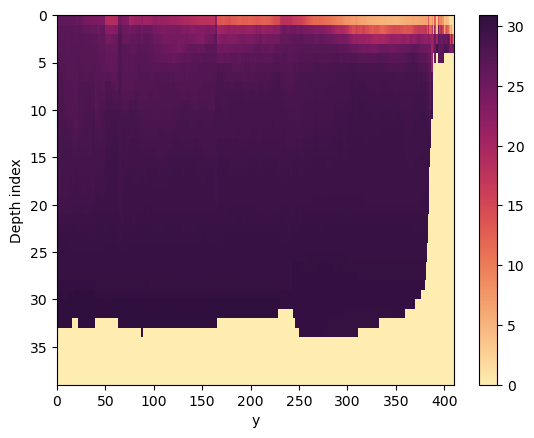

In [38]:
fig,ax = plt.subplots()

pm = ax.pcolormesh(ProfilesDict[22],cmap=cm.cm.matter)
ax.invert_yaxis()
ax.set_xlabel('y')
ax.set_ylabel('Depth index')

cb = fig.colorbar(pm)

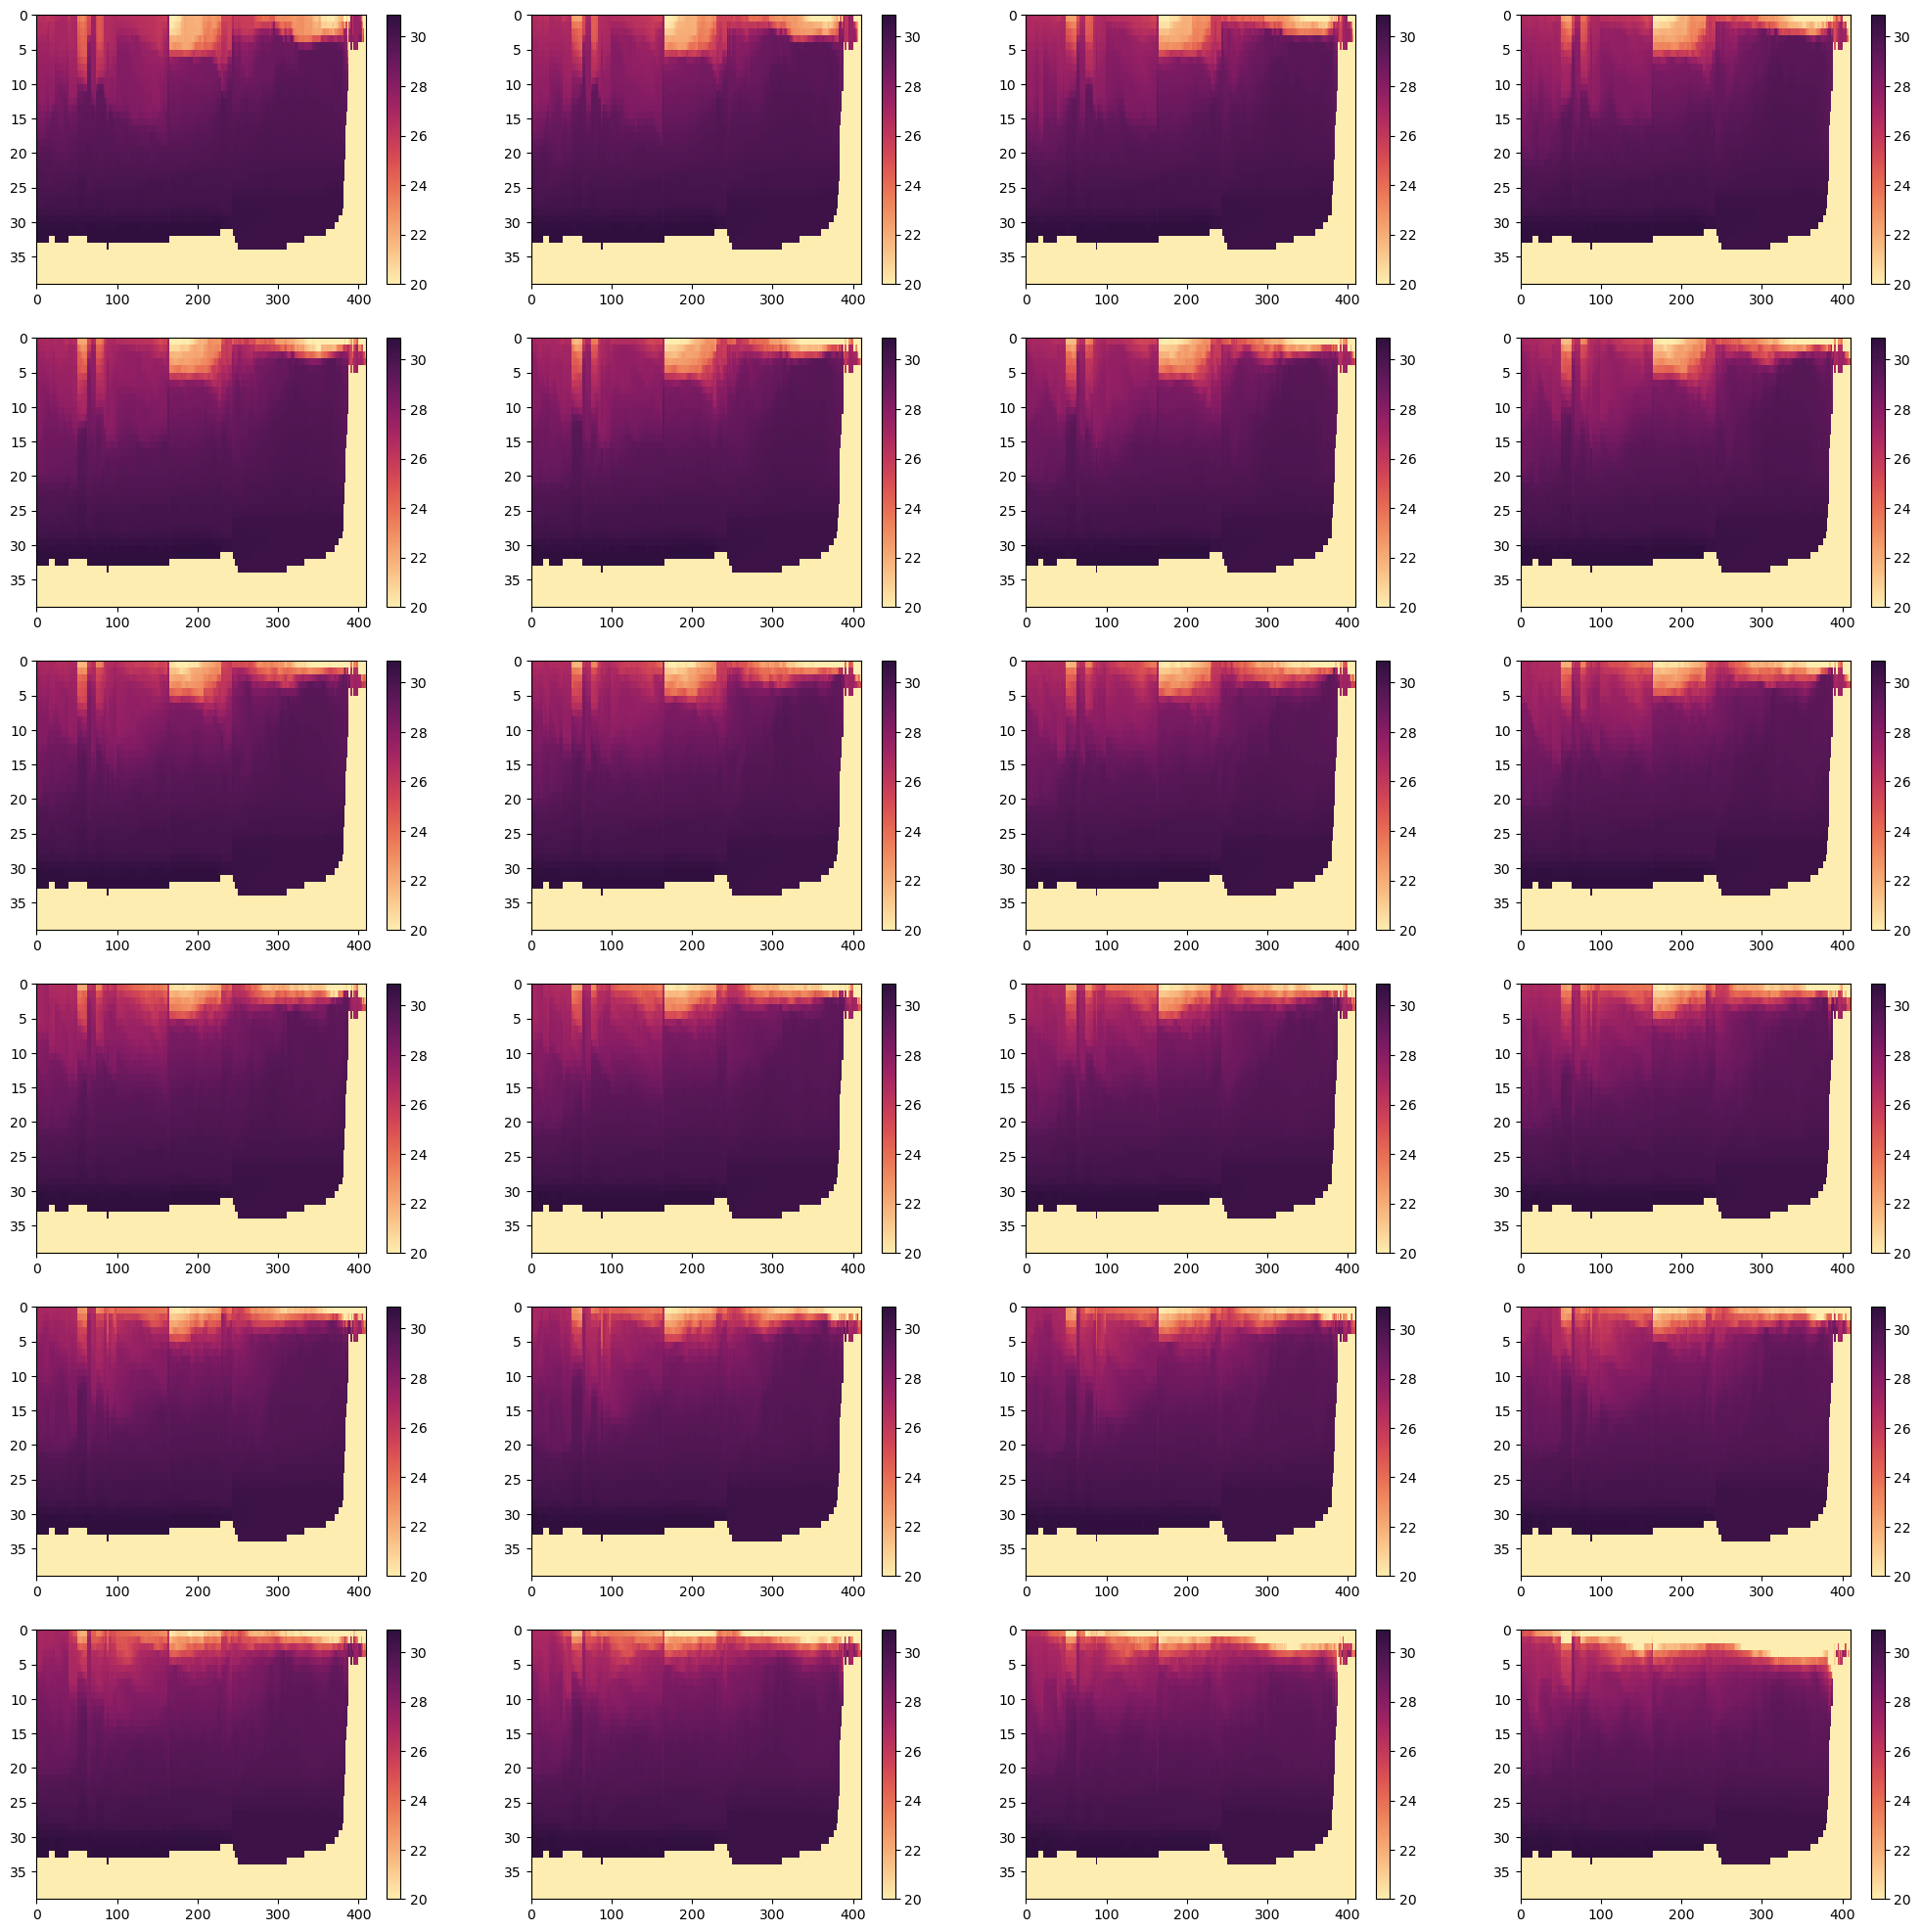

In [56]:
nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))

# date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for ii in range(nrows):
    for jj in range(ncols):
        pc = ax[ii,jj].pcolormesh(ProfilesDict[ncols*ii+jj],cmap=cm.cm.matter,vmin=20)
        ax[ii,jj].invert_yaxis()
        fig.colorbar(pc)

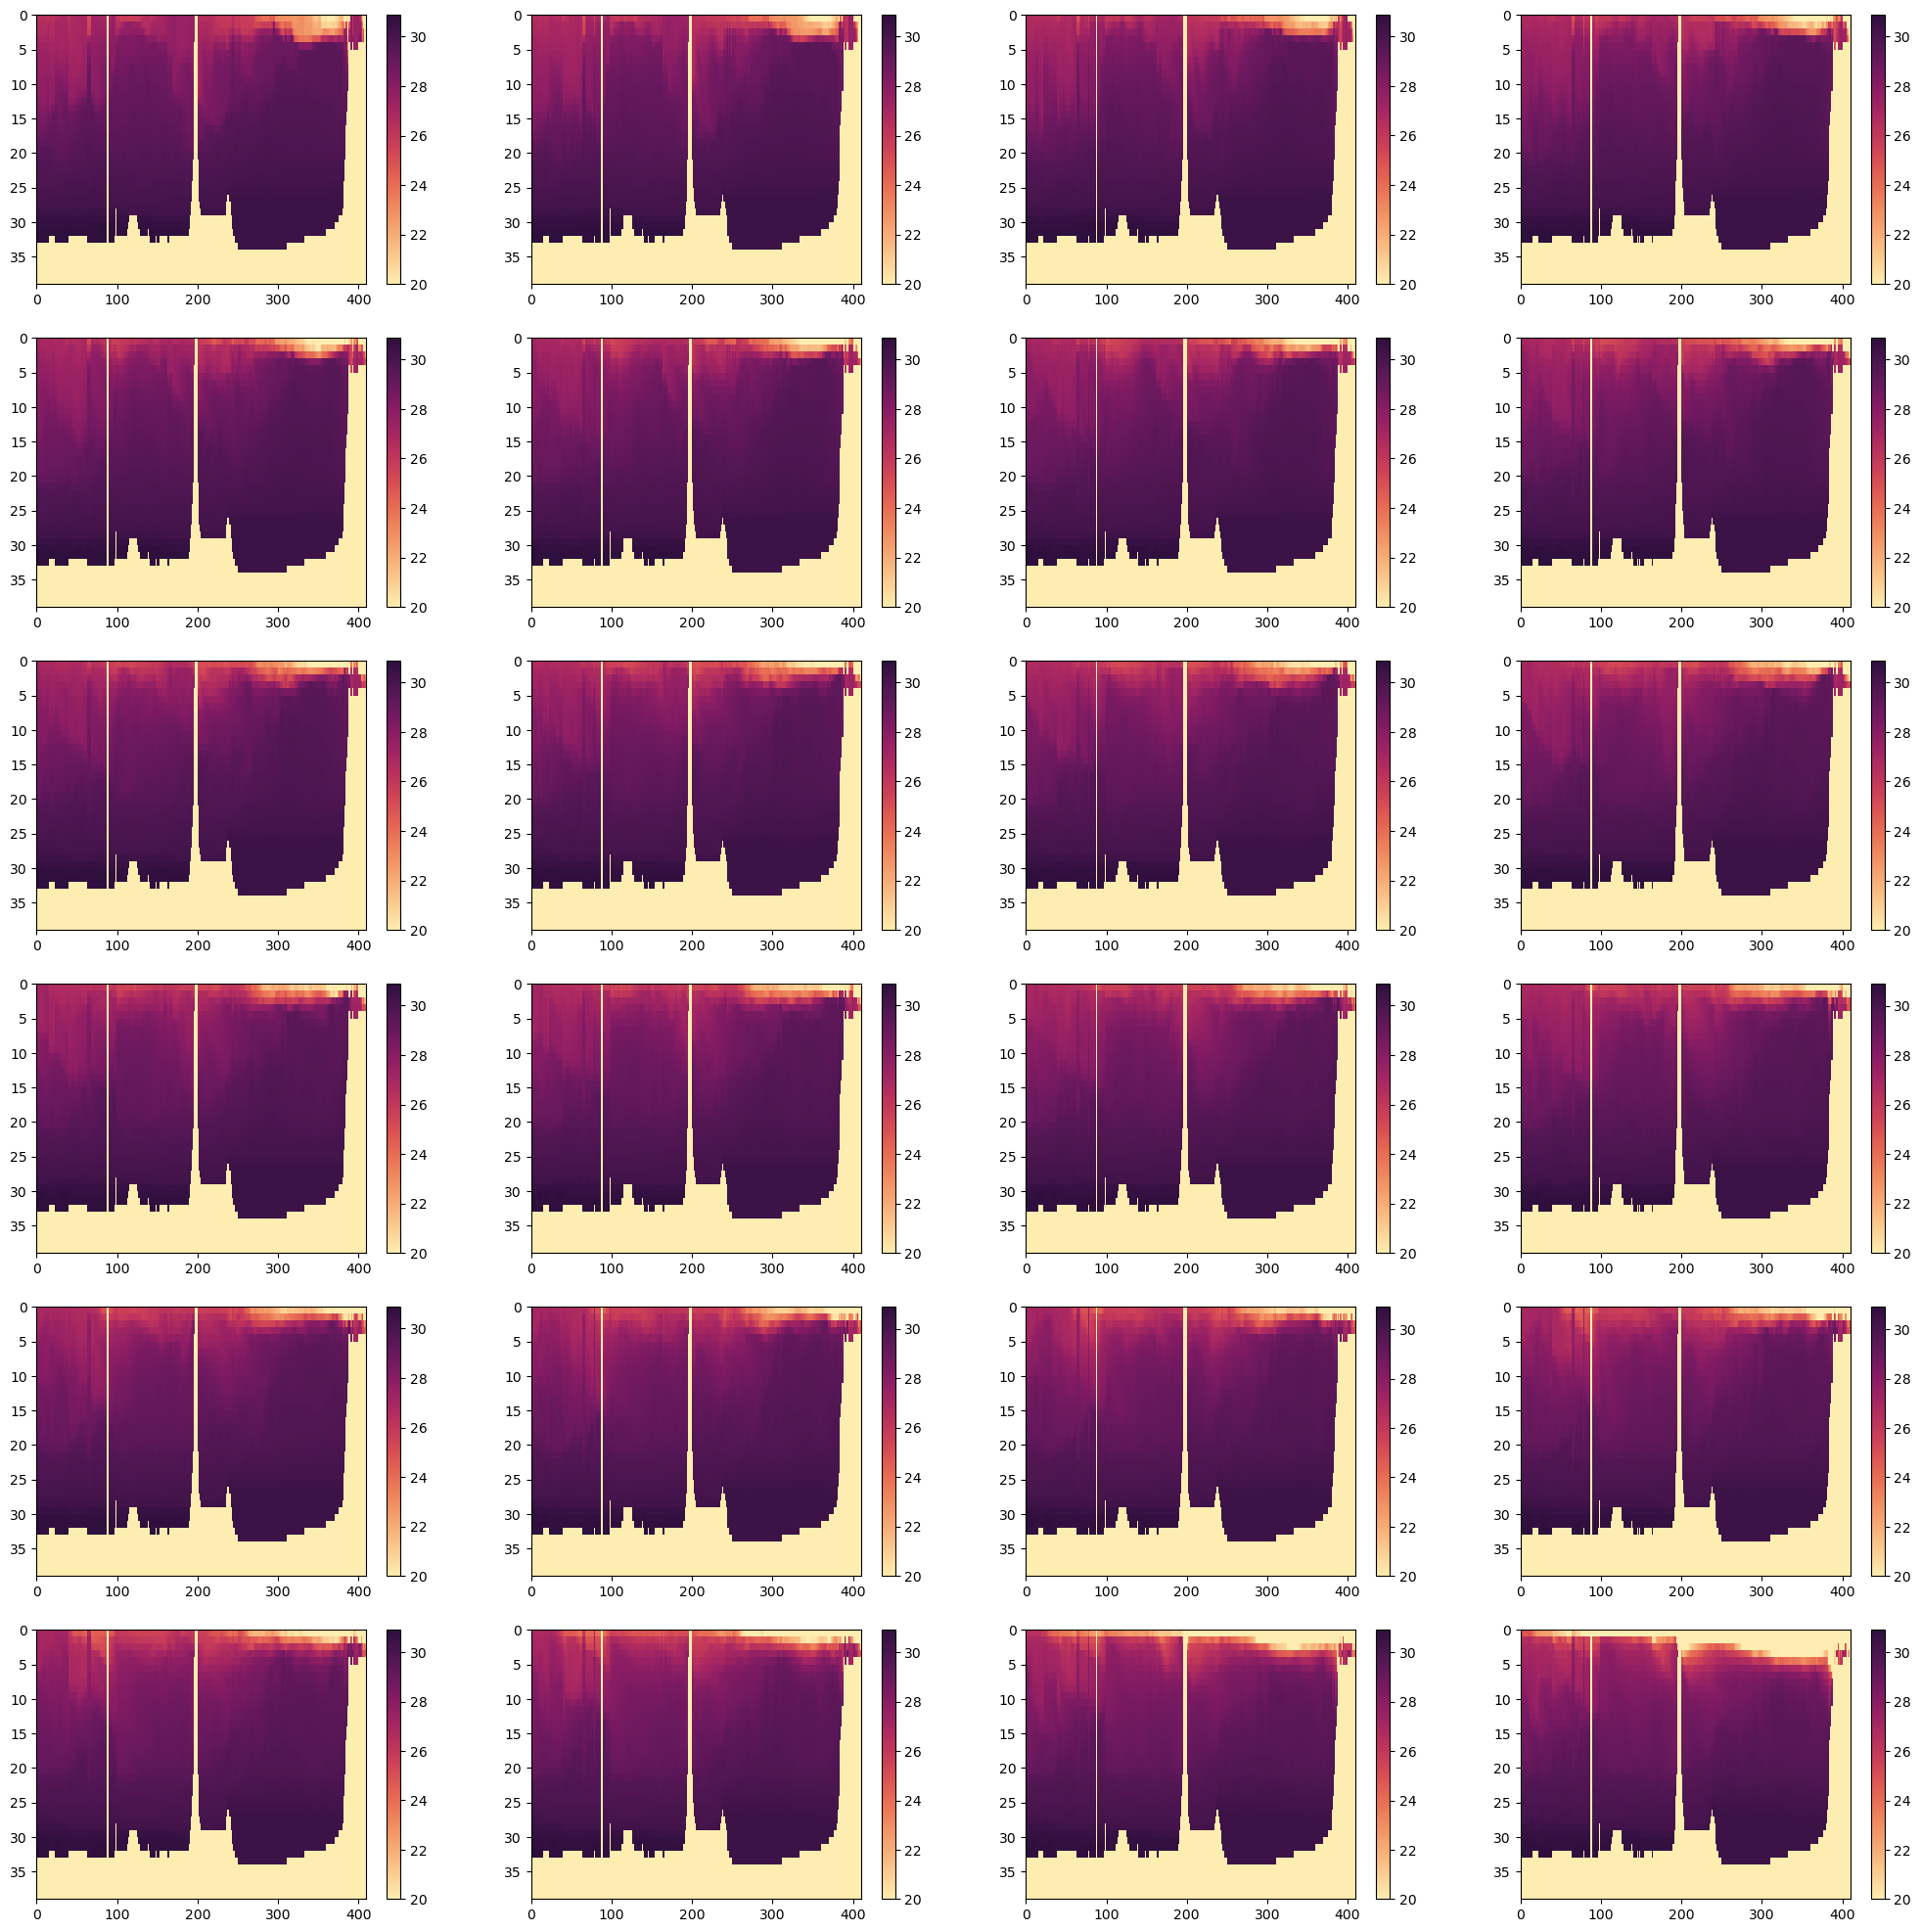

In [58]:
nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))

cmap = cm.cm.matter
cmap.set_bad('grey')

# date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for ii in range(nrows):
    for jj in range(ncols):
        pc = ax[ii,jj].pcolormesh(ProfilesDict2[ncols*ii+jj],cmap=cmap,vmin=20)
        ax[ii,jj].invert_yaxis()
        fig.colorbar(pc)

### Time of failure

Time step start: 34560

Time step failure (from time.step): 36398

Time steps in 1 day: 4320

But theres only 1 time step in abort?

Text(0, 0.5, 'Salinity (g/kg)')

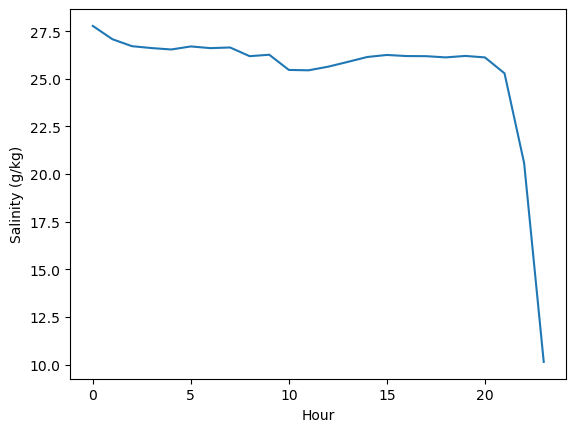

In [41]:
fig,ax = plt.subplots()
ax.plot(feb25_GridT.time_counter.dt.hour.values,feb25_GridT.vosaline[:,0,590,140].values)
ax.set_xlabel('Hour')
ax.set_ylabel('Salinity (g/kg)')

In [42]:
feb25_GridT.deptht

<xarray.DataArray 'deptht' (deptht: 39)>
array([  0.5     ,   1.500003,   2.500011,   3.500031,   4.500071,   5.500151,
         6.50031 ,   7.500623,   8.501236,   9.502433,  10.504766,  11.509312,
        12.518167,  13.535412,  14.568982,  15.634288,  16.761173,  18.007135,
        19.481785,  21.389978,  24.100256,  28.229916,  34.685757,  44.517723,
        58.484333,  76.58559 ,  98.06296 , 121.866516, 147.08946 , 173.11449 ,
       199.57304 , 226.2603  , 253.06664 , 279.93454 , 306.8342  , 333.75018 ,
       360.67453 , 387.6032  , 414.5341  ], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 0.5 1.5 2.5 3.5 4.5 ... 333.8 360.7 387.6 414.5
Attributes:
    name:       deptht
    long_name:  Vertical T levels
    units:      m
    positive:   down
    bounds:     deptht_bounds

Text(0.5, 1.0, 'Top 30 m')

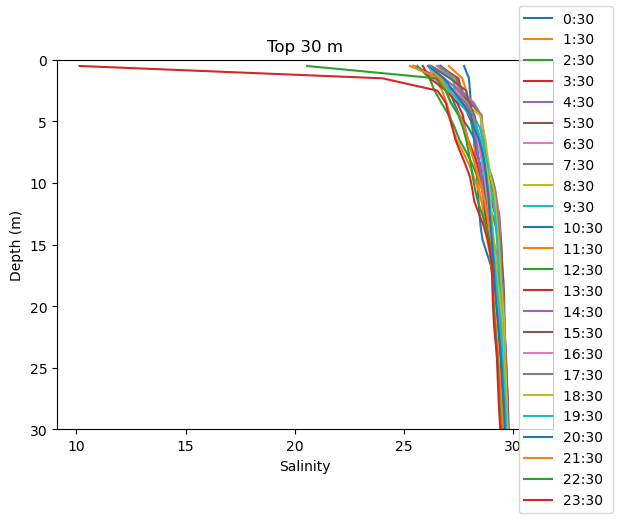

In [43]:
fig,ax = plt.subplots()

for ii in np.arange(0,24,1):
    ax.plot(feb25_GridT.vosaline[ii,:32,590,140],feb25_GridT.deptht[:32],label=f'{feb25_GridT.time_counter[ii].dt.hour.values}:30 ')

ax.set_ylim(0,30)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Salinity')
fig.legend()
ax.set_title('Top 30 m')


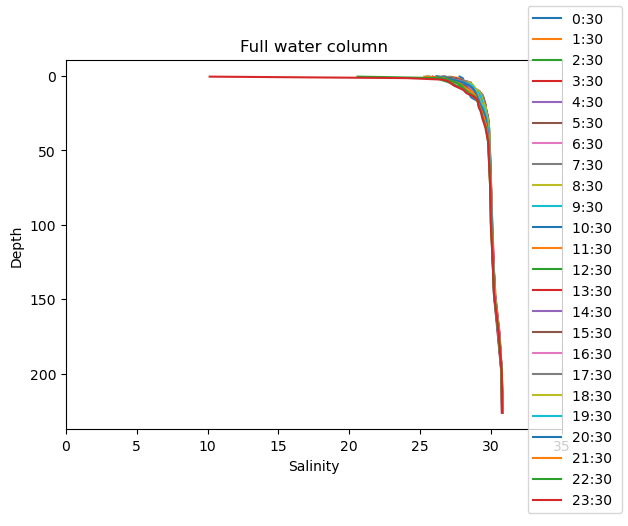

In [44]:
fig,ax = plt.subplots()

for ii in np.arange(0,24,1):
    ax.plot(feb25_GridT.vosaline[ii,:32,590,140],feb25_GridT.deptht[:32],label=f'{feb25_GridT.time_counter[ii].dt.hour.values}:30 ')

ax.set_xlim(0,35)
ax.invert_yaxis()
ax.set_ylabel('Depth')
ax.set_xlabel('Salinity')
ax.set_title('Full water column')
fig.legend()



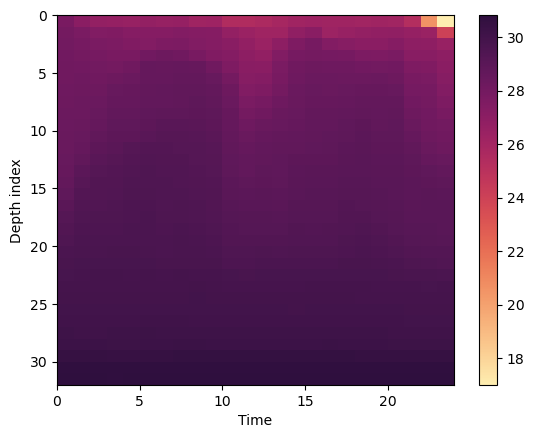

In [45]:
fig,ax = plt.subplots()

pm = ax.pcolormesh(feb25_GridT.vosaline[:,:32,590,140].T,cmap=cm.cm.matter,vmin=17)
ax.invert_yaxis()
ax.set_xlabel('Time')
ax.set_ylabel('Depth index')

cb = fig.colorbar(pm)